### Activity lines of the K2 V471 Tau

- We can identify in H$\beta$ two emission lines that are located at -240 km/s ($\sim$ 485.7 nm) and 300 km/s ($\sim$~486.7 nm).

 2004 | 2005 | 2014
-|-|-
![](figs/dynha2004.png)    | ![](figs/dynha2005.png)    | ![](figs/dynha2014.png)   
![](figs/dynhb2004.png)    | ![](figs/dynhb2005.png)    | ![](figs/dynhb2014.png)
![](figs/dynCaHK2004.png)  | ![](figs/dynCaHK2005.png)  | ![](figs/dynCaHK2014.png)
![](figs/dynCaIRT2004.png) | ![](figs/dyncaIRT2005.png) | ![](figs/dynCaIRT2014.png)

Fig.1: Dynamical spectra of active lines, in the rest frame of the K2 dwarf, for observations in late 2004 (left), Dec 2005 (center), and Dec 2014 (right). The vertical dashed lines correspond to the stellar rotational broadening of $\pm v\sin(i)$. A sine wave of amplitude $215$~km/s is over-plotted on the 2004 and 2014 dynamical spectra of H$\alpha$. 



### Is there really an H$\alpha$ modulation in V471 Tau?

- Bois et al. (1991): decrease 1975 to 1983; grow in 1984;
- Rottler (2002): decrease 1985 and 1992 (almost zero emission)
- Kaminski et al. (2007): ~average value in Dec 2005 (they mention -0.5 angstrom at phase 0.5)
  - Kaminski et al. (2007) suggest a 9 yrs periodicity in the central emission (phase 0.5); 
      - **IF this periodicity exists, all ESPADONS observations so far are placed in the average emission.** Indeed we observe EQWs ~0.5 angstrom for the three years.
      - New observations in Dec 2020/ Jan 2021 would be placed for the first time in the _supposed_ maximum of H$\alpha$ cycle.

![](figs/Halpha_all.png)
Fig.2: Equivalent width of H$\alpha$ folded in phase for observations in late 2004 (red), Dec 2005 (blue), and Dec 2014 (black).

In [1]:
47.70*3.0857e18

1.4718789000000001e+20

### Parameters and constants

In [2]:
# Parameters


##################
# K2 star params #
##################
# cgs
Mk2 = 0.9971*1.989e33   # in g; K2 mass
Rk2 = 65174609500. # in cm; radius of the K2 star
Tk2 = 5066         # in K; temperature K2 star
vsini = 89.3*1.e5  # in cm/s

#################
# System params #
#################
d = 1.47188e20    # in cm; distance system/earth
Dwd = 3.586*Rk2    # in cm; Position of WD relative to the centre of the K2 star
Dcm = 1.679*Rk2    # in cm; Position of CM relative to the centre of the K2 star
period = 0.521183398*24.*3600. # in s
Omega = 2.*N.pi/period         # in rad/s
Dcm = 1.679*Rk2       # in cm; Position of CM relative to the centre of the K2 star


##################
# WD star params #
##################
# cgs
Mwd = 0.8778*1.989e33   # in g; WD mass
Rwd = 0.011*Rk2      # in cm; radius of the WD star


#####################
# Prominence params #
#####################
Ksini = 210*1.e5        # in cm/s
l = 0.5*Rk2             # in cm; prominence radius
v = 4/3.*N.pi*l**3      # in cm3; volume
Dprom = Ksini/vsini*Rk2 # in cm; distance of the Prominence to K2 star
DPromToWD = Dwd - Dprom # in cm; distance of the Prominence to WD star 
DPromToCM = Dprom - Dcm # in cm; distance of the Prominence to CM
EW_Ha = 0.33e-8    # in cm; Equivalent width  H alpha flux in 2004
EW_Hb = 0.10e-8    # in cm; Equivalent width  H beta flux in 2004

#############
# constants #
#############
l_Ha = 656.28e-7      # in cm; Halpha wavelength 
c = 29979245800.      # in cm/s; speed of light  
h = 6.6261e-27        # in cm2g/s; Planck constant
Kb = 1.3807e-16       # in cm2g/s2/K; Boltzmann constant
sigma = 5.6704e-5     # in g/s3/K4; Stefan-Boltzman constant
G = 6.6743e-8         # in cm3/g/s2; gravitational constant
hmass = 1.6735575e-24 # in g; hydrogen mass 

##########################


# System's gravity

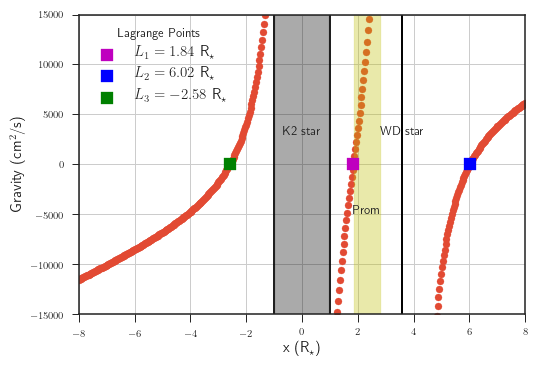

In [3]:
def grav(x):
    # Define local gravity
    return - G*Mk2/x**2*x/N.abs(x) + G*Mwd/(Dwd - x)**2*(Dwd - x)/N.abs(Dwd - x) + Omega**2*(x - Dcm)

    
    
    
##### 
xtmp = N.linspace(-8*Rk2,8*Rk2, 500)
cond = N.bitwise_and(N.abs(xtmp) > Rk2, N.abs(xtmp - Dwd) > Rwd)
x = xtmp[cond]
### Gravity
y = grav(x)

### Plot
P.style.use(['seaborn-white', 'seaborn-paper', 'seaborn-ticks'])

fig = P.figure(dpi=90)

# K2
P.scatter(x/Rk2, (y))
P.plot(N.ones(10), N.linspace(-1e5,1.e5, 10), 'k')
P.plot(-N.ones(10), N.linspace(-1.e5,1.e5, 10), 'k')
P.fill_between(xtmp[N.abs(xtmp) <= Rk2]/Rk2, -1.e5,1.e5, color='k', alpha=1./3)

# WD
P.plot((Dwd+Rwd)*N.ones(10)/Rk2, N.linspace(-1.e5,1.e5, 10), 'k')
P.plot((Dwd-Rwd)*N.ones(10)/Rk2, N.linspace(-1.e5,1.e5, 10), 'k')

# Prominence
P.fill_between(xtmp[N.abs(xtmp - Dprom) <= l]/Rk2, -1.e5,1.e5, color='y', alpha=1./3)



# L1 point
Dl1 = 1.84*Rk2     # in cm; distance fo the L1 point to the centre of the K2 star
P.scatter(Dl1/Rk2, 0, marker='s', s=100, color='m', label=r'$L_1 = 1.84$ R$_\star$')


# L2 point
Dl2 = 6.02*Rk2    # in cm; distance fo the L2 point to the centre of the K2 star
P.scatter(Dl2/Rk2, 0, marker='s', s=100, color='b', label=r'$L_2 = 6.02$ R$_\star$')


# L3 point
Dl3 = -2.58*Rk2    # in cm; distance fo the L3 point to the centre of the K2 star
P.scatter(Dl3/Rk2, 0, marker='s', s=100, color='g', label=r'$L_3 = -2.58$ R$_\star$')


P.text(0, 3.e3, 'K2 star', ha='center')
P.text(Dwd/Rk2, 3.e3, 'WD star', ha='center')
P.text(Dprom/Rk2, -5000, 'Prom', ha='center')


P.xlabel(r'x (R$_\star$)',fontsize='large')
P.ylabel(r'Gravity (cm$^2$/s)',fontsize='large')

P.legend(title='Lagrange Points', loc='upper left', fontsize='large')

#P.ylim((1.e2,1.e5)); P.yscale('log')
P.ylim((-15000,15000))
P.xlim((-8,8))
P.grid()
P.show()

In [4]:
print(grav(Dprom+l))

48523.52243371951


# Compute field strength

In [7]:
## Transmition coeficients
# ktc =12.276e-25  # transmition coeficient for prominence temp 2500 K
ktc =6.71e-25      # transmition coeficient for prominence temp 5000 K
# ktc =3.5588e-25  # transmition coeficient for prominence temp 10000 K

#############
print('PROMINENCE -- Basic parameters')

######## first we compute the flux in Halpha:
## Using the R band (Bessel et al. 1979)
F0 = 3.08e-20 # in erg/cm2/hz; Spectral flux density per frequency at magnitude zero R band
F0_lamb = F0*(c/l_Ha**2) # in erg/cm2/cm; Spectral flux density per wavelength
Rmag = 8.803  # taken from Vaccaro et al. 2015
f_Ha = F0_lamb*EW_Ha/10**(0.4*Rmag)
print('flux = %1.1f x 10^-13 erg/s/cm2' %(f_Ha/1.e-13))
#############
#
NH = N.sqrt(3*f_Ha*d**2/(ktc*l**3)) 
print(r'N = %1.1f x 10^10' %(NH/1.e10)) 
#
density = NH*hmass  
mass = 4./3.*N.pi*density*l**3 
print('density = %1.2f x 10^-14 g/cm3' %(density/1.e-14))
print('mass = %1.2f x 10^18 g' %(mass/1.e18))
print('\n\n\n')



############## Local gravity #####################
## 1. at the prominence position:
print('        PROMINENCE      ')
print('PROMINENCE - l')
g_prom = grav(Dprom-l)  # gravity at prominence distance
print('gravity = %d cm/s2' %g_prom)
#
Rc = 0.3*Rk2 # in cm;  Curvature radius 
#
# Minimum field strength to hold the prominence
B = N.sqrt(4*N.pi*Rc*density*g_prom)
print('B >= ', B)
#
# Dipole intensity at the surface to genarate the field above at the promience distance.
Bsurf = B*Dprom**3/Rk2**3
print('Bsurf >= ', Bsurf)
print('\n')

print('PROMINENCE center')
g_prom = grav(Dprom)  # gravity at prominence distance
print('gravity = %d cm/s2' %g_prom)
#
Rc = 0.3*Rk2 # in cm;  Curvature radius 
#
# Minimum field strength to hold the prominence
B = N.sqrt(4*N.pi*Rc*density*g_prom)
print('B >= ', B)
#
# Dipole intensity at the surface to genarate the field above at the promience distance.
Bsurf = B*Dprom**3/Rk2**3
print('Bsurf >= ', Bsurf)
print('\n')

print('PROMINENCE + l')
g_prom = grav(Dprom+l)  # gravity at prominence distance
print('gravity = %d cm/s2' %g_prom)
#
Rc = 0.3*Rk2 # in cm;  Curvature radius 
#
# Minimum field strength to hold the prominence
B = N.sqrt(4*N.pi*Rc*density*g_prom)
print('B >= ', B)
#
# Dipole intensity at the surface to genarate the field above at the promience distance.
Bsurf = B*Dprom**3/Rk2**3
print('Bsurf >= ', Bsurf)
print('-----------------------')
print('\n\n\n')



## 2. for a virtual prominence at the opposite hemisphere:
print('OPOSITE HEMISPHERE')
g_hem = grav(-Dprom)
print('gravity = %d cm/s2' %(g_hem))
#
# Minimum field strength to hold the virtual prominence
B = N.sqrt(4*N.pi*Rc*density*g_hem)
print('B >= ', B)
#
# Dipole intensity at the surface to genarate the field above
Bsurf = B*Dprom**3/Rk2**3
print('Bsurf >= ', Bsurf)
print('\n\n\n')



## 3. Gravity at the L3 point:
print('OPOSITE HEMISPHERE --- L3')
g_l3 =  grav(-2.5799*Rk2)  #### notice we are actually using 2 digits precision in the paper: Dl3 ~ -2.58 Rk2
print('gravity = %d cm/s2' %(g_l3))

PROMINENCE -- Basic parameters
flux = 2.1 x 10^-13 erg/s/cm2
N = 2.4 x 10^10
density = 4.09 x 10^-14 g/cm3
mass = 5.92 x 10^18 g




        PROMINENCE      
PROMINENCE - l
gravity = 249 cm/s2
B >=  1.5843595991907735
Bsurf >=  20.604271647399504


PROMINENCE center
gravity = 13223 cm/s2
B >=  11.52311639151553
Bsurf >=  149.85576536832622


PROMINENCE + l
gravity = 48523 cm/s2
B >=  22.073823547600743
Bsurf >=  287.0655480636029
-----------------------




OPOSITE HEMISPHERE
gravity = 1298 cm/s2
B >=  3.6110344678760264
Bsurf >=  46.96076265908464




OPOSITE HEMISPHERE --- L3
gravity = 0 cm/s2


------
## Playing around with the curvature radius

    1. Rc = 0.1 Rk2

In [6]:
############## Local gravity #####################
## 1. at the prominence position:
print('PROMINENCE')
g_prom = grav(Dprom)  # gravity at prominence distance

########
Rc = 0.1*Rk2 # in cm;  Curvature radius 
########


# Minimum field strength to hold the prominence
B = N.sqrt(4*N.pi*Rc*density*g_prom)
print('B >= %d G' %B)
#
# Dipole intensity at the surface to genarate the field above at the promience distance.
Bsurf = B*Dprom**3/Rk2**3
print('Bsurf >= %d G' %Bsurf)

PROMINENCE
B >= 6 G
Bsurf >= 86 G


------
    2. Rc = 0.2 Rk2

In [7]:
############## Local gravity #####################
## 1. at the prominence position:
print('PROMINENCE')
g_prom = grav(Dprom)  # gravity at prominence distance

#########
Rc = 0.2*Rk2 # in cm;  Curvature radius 
#########

# Minimum field strength to hold the prominence
B = N.sqrt(4*N.pi*Rc*density*g_prom)
print('B >= %d G' %B)
#
# Dipole intensity at the surface to genarate the field above at the promience distance.
Bsurf = B*Dprom**3/Rk2**3
print('Bsurf >= %d G' %Bsurf)

PROMINENCE
B >= 9 G
Bsurf >= 122 G


-------


    3. Rc = 0.3 Rk2 (used in Donati et al. 2000)

In [8]:
############## Local gravity #####################
## 1. at the prominence position:
print('PROMINENCE')
g_prom = grav(Dprom)  # gravity at prominence distance

########
Rc = 0.3*Rk2 # in cm;  Curvature radius 
#######


# Minimum field strength to hold the prominence
B = N.sqrt(4*N.pi*Rc*density*g_prom)
print('B >= %d G' %B)
#
# Dipole intensity at the surface to genarate the field above at the promience distance.
Bsurf = B*Dprom**3/Rk2**3
print('Bsurf >= %d G' %Bsurf)

PROMINENCE
B >= 11 G
Bsurf >= 149 G


## Prominence 2014

In [9]:
# Parameters
#####################
# Prominence params #
#####################
Ksini_2014 = 205*1.e5   # in cm/s
l_2014 = 0.52*Rk2             # in cm; prominence radius
v_2014 = 4/3.*N.pi*l_2014**3      # in cm3; volume
Dprom_2014 = Ksini_2014/vsini*Rk2 # in cm; distance of the Prominence to K2 star
DPromToWD_2014 = Dwd - Dprom_2014 # in cm; distance of the Prominence to WD star 
DPromToCM_2014 = Dprom_2014 - Dcm # in cm; distance of the Prominence to CM
EW_Ha_2014 = 0.17e-8    # in cm; Equivalent width  H alpha flux in 2014
EW_Hb_2014 = 0.042e-8    # in cm; Equivalent width  H beta flux in 2014

In [10]:
## Transmition coeficients
# ktc =12.276e-25  # transmition coeficient for prominence temp 2500 K
ktc =6.71e-25      # transmition coeficient for prominence temp 5000 K
# ktc =3.5588e-25  # transmition coeficient for prominence temp 10000 K

#############
print('PROMINENCE 2014 -- Basic parameters')

######## first we compute the flux in Halpha:
## Using the R band (Bessel et al. 1979)
F0 = 3.08e-20 # in erg/cm2/hz; Spectral flux density per frequency at magnitude zero R band
F0_lamb = F0*(c/l_Ha**2) # in erg/cm2/cm; Spectral flux density per wavelength
Rmag = 8.803  # taken from Vaccaro et al. 2015
f_Ha_2014 = F0_lamb*EW_Ha_2014/10**(0.4*Rmag)
print('flux = %1.1f x 10^-13 erg/s/cm2' %(f_Ha_2014/1.e-13))
#############
#
NH_2014 = N.sqrt(3*f_Ha_2014*d**2/(ktc*l_2014**3)) 
print(r'N = %1.1f x 10^10' %(NH_2014/1.e10)) 
#
density_2014 = NH_2014*hmass  
mass_2014 = 4./3.*N.pi*density_2014*l_2014**3 
print('density = %1.2f x 10^-14 g/cm3' %(density_2014/1.e-14))
print('mass = %1.2f x 10^18 g' %(mass_2014/1.e18))
print('\n\n\n')



############## Local gravity #####################
## 1. at the prominence position:
print('PROMINENCE 2014')
g_prom_2014 = grav(Dprom_2014)  # gravity at prominence distance
print('gravity = %d cm/s2' %g_prom_2014)
#
Rc = 0.3*Rk2 # in cm;  Curvature radius 
#
# Minimum field strength to hold the prominence
B = N.sqrt(4*N.pi*Rc*density_2014*g_prom_2014)
print('B >= ', B)
#
# Dipole intensity at the surface to genarate the field above at the promience distance.
Bsurf = B*Dprom_2014**3/Rk2**3
print('Bsurf >= ', Bsurf)
print('\n\n\n')



## 2. for a virtual prominence at the opposite hemisphere:
print('OPOSITE HEMISPHERE')
g_hem_2014 = grav(-Dprom_2014)
print('gravity = %d cm/s2' %(g_hem_2014))
#
# Minimum field strength to hold the virtual prominence
B = N.sqrt(4*N.pi*Rc*density_2014*g_hem_2014)
print('B >= ', B)
#
# Dipole intensity at the surface to genarate the field above
Bsurf = B*Dprom_2014**3/Rk2**3
print('Bsurf >= ', Bsurf)
print('\n\n\n')



## 3. Gravity at the L3 point:
print('OPOSITE HEMISPHERE --- L3')
g_l3 =  grav(-2.5799*Rk2)  #### notice we are actually using 2 digits precision in the paper: Dl3 ~ -2.58 Rk2
print('gravity = %d cm/s2' %(g_l3))

PROMINENCE 2014 -- Basic parameters
flux = 1.1 x 10^-13 erg/s/cm2
N = 1.7 x 10^10
density = 2.77 x 10^-14 g/cm3
mass = 4.51 x 10^18 g




PROMINENCE 2014
gravity = 11345 cm/s2
B >=  8.780495046932032
Bsurf >=  106.22487011898205




OPOSITE HEMISPHERE
gravity = 1662 cm/s2
B >=  3.3613900509448507
Bsurf >=  40.665500028454055




OPOSITE HEMISPHERE --- L3
gravity = 0 cm/s2


In [11]:
Dprom/Rk2

2.3516237402015676